In [24]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize 
import pandas as pd
import numpy as np
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Import data

In [25]:
main_df = pd.read_csv('apple_goog.csv', index_col=0)

In [26]:
main_df = main_df.drop_duplicates(subset='c_tweet', keep="first")

# remove rogue nan value in the tweets
main_df.drop(main_df.index[40395], inplace=True)

In [27]:
main_df.shape

(459853, 8)

# Tagging sentiment of each tweet

In [62]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):

    score = analyzer.polarity_scores(sentence)
    

    if score['compound'] >= .05:
        sent = 'positive'
    
    elif score['compound'] <= -.05:
        sent = 'negative'
       
    else:
        sent = 'neutral'
        

    return sent

In [64]:
main_df['sentiment'] = main_df.c_tweet.apply(sentiment_analyzer_scores)

In [69]:
main_df.head(5)

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet,sentiment
1,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...,positive
4,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...,positive
5,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...,positive
7,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...,neutral
10,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...,negative


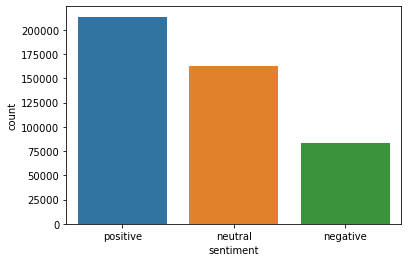

In [71]:
sns.countplot('sentiment', data=main_df);

In [78]:
sns.barplot(x='sentiment', y='search_term', data=main_df)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

KeyError: 'positive'

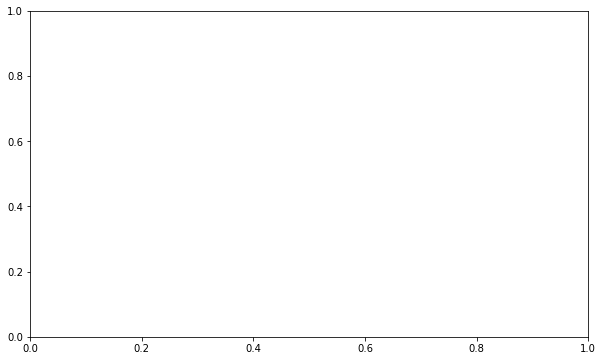

In [84]:
x=main_df["sentiment"].value_counts().index.to_list()
y = main_df["sentiment"].value_counts().to_list()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=x, y=y, hue=main_df.search_term)
plt.title("Number of Tweets per term")
plt.xlabel("Search Terms")
plt.ylabel("Number of tweets found");

In [85]:
main_df.groupby(['sentiment'])